In [174]:
from google_play_scraper import app
from google_play_scraper import Sort, reviews
import pandas as pd
import numpy as np

In [175]:
from IPython.display import Image 
Image(url="silver-wolf.jpg", width=300, height=400) 

In [176]:
result, continuation_token = reviews(
    'com.HoYoverse.hkrpgoversea',
    lang='en',  
    country='id', 
    sort=Sort.MOST_RELEVANT,
    count=1000, 
)

In [177]:
data = pd.DataFrame(np.array(result),columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,6c5ddfc1-419c-491d-a58a-5a735b74270b,audry kartono,https://play-lh.googleusercontent.com/a-/ALV-U...,Honkai: Star Rail is a very creative and imagi...,5,20,2.0.0,2024-03-18 18:16:30,None,NaT,2.0.0
1,5964e1d0-c62c-4b47-9098-3b8cf9204305,Ren Shiro,https://play-lh.googleusercontent.com/a-/ALV-U...,It's a very fun to play game!!! I love every s...,5,168,2.0.0,2024-02-13 06:50:45,None,NaT,2.0.0
2,0f9b8755-84a0-478e-a45a-fbdbeeb257e5,Nami Ichinamin,https://play-lh.googleusercontent.com/a/ACg8oc...,Great game. Stunning graphics and I love the M...,5,56,2.0.0,2024-02-10 12:45:56,None,NaT,2.0.0
3,4b59b32a-2a9b-40f2-bc6f-b40379ac7744,Zeus 01,https://play-lh.googleusercontent.com/a/ACg8oc...,"One of the best RPGs in 2023, and this is comi...",5,138,2.0.0,2024-02-06 10:51:20,None,NaT,2.0.0
4,61be27b2-b15a-4424-9e16-754351fff643,Gabriella Isabel Valencia,https://play-lh.googleusercontent.com/a/ACg8oc...,I love the characters' detail! And the map is ...,5,20,2.0.0,2024-03-23 19:15:15,None,NaT,2.0.0


In [178]:
len(data.index) 

398

In [179]:
data[['userName', 'score','at', 'content']].head()  

,userName,score,at,content
0,audry kartono,5,2024-03-18 18:16:30,Honkai: Star Rail is a very creative and imagi...
1,Ren Shiro,5,2024-02-13 06:50:45,It's a very fun to play game!!! I love every s...
2,Nami Ichinamin,5,2024-02-10 12:45:56,Great game. Stunning graphics and I love the M...
3,Zeus 01,5,2024-02-06 10:51:20,"One of the best RPGs in 2023, and this is comi..."
4,Gabriella Isabel Valencia,5,2024-03-23 19:15:15,I love the characters' detail! And the map is ...


In [180]:
new_data = data[['userName', 'score','at', 'content']]
sorted_data = new_data.sort_values(by='at', ascending=False) 
sorted_data.head()

,userName,score,at,content
65,Yoshida K,4,2024-03-25 20:07:54,"Absolutely love it, even for the arts, animati..."
17,Kioanha K,5,2024-03-25 16:10:45,"Redo-ing my reviews, Dev is quick to answer is..."
181,dendy ma,1,2024-03-25 14:30:00,The title screen is unnecesarily heavy. Please...
155,Diane Woiak,1,2024-03-25 14:23:12,I have written this review just to address a f...
391,Ask me WHO,5,2024-03-25 14:04:54,"Play since day 1, no complaining everything pe..."


In [181]:
data = sorted_data[['userName', 'score','at', 'content']] 

In [182]:
data=data[['content', 'score']]

In [183]:
data.head()

,content,score
65,"Absolutely love it, even for the arts, animati...",4
17,"Redo-ing my reviews, Dev is quick to answer is...",5
181,The title screen is unnecesarily heavy. Please...,1
155,I have written this review just to address a f...,1
391,"Play since day 1, no complaining everything pe...",5


In [184]:
def labelled(score):
  if score < 3:
    return 'Negative'
  elif score == 4 :
    return 'Positive'
  elif score == 5 :
    return 'Positive'
data['Label'] = data ['score'].apply(labelled)
data.head(50)

,content,score,Label
65,"Absolutely love it, even for the arts, animati...",4,Positive
17,"Redo-ing my reviews, Dev is quick to answer is...",5,Positive
181,The title screen is unnecesarily heavy. Please...,1,Negative
155,I have written this review just to address a f...,1,Negative
391,"Play since day 1, no complaining everything pe...",5,Positive
349,Since im so busy with life now but still want ...,5,Positive
166,After playing since release I've really gotta ...,4,Positive
143,Well I have played Honkai Star Rail for a year...,5,Positive
41,"I love this game! It functions very very well,...",5,Positive
210,Previous review is what happens when you drop ...,5,Positive


In [185]:
data.to_csv("hsr.csv", index = False) 

In [186]:
import pandas as pd
pd.set_option('display.max_columns', None)
data = pd.read_csv('hsr.csv')
data.head(50)

,content,score,Label
0,"Absolutely love it, even for the arts, animati...",4,Positive
1,"Redo-ing my reviews, Dev is quick to answer is...",5,Positive
2,The title screen is unnecesarily heavy. Please...,1,Negative
3,I have written this review just to address a f...,1,Negative
4,"Play since day 1, no complaining everything pe...",5,Positive
5,Since im so busy with life now but still want ...,5,Positive
6,After playing since release I've really gotta ...,4,Positive
7,Well I have played Honkai Star Rail for a year...,5,Positive
8,"I love this game! It functions very very well,...",5,Positive
9,Previous review is what happens when you drop ...,5,Positive


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  398 non-null    object
 1   score    398 non-null    int64 
 2   Label    346 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


In [188]:
data.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
393,False,False,False
394,False,False,False
395,False,False,False
396,False,False,False


In [189]:
data.isna().any()

content    False
score      False
Label       True
dtype: bool

In [190]:
data.describe()

,score
count,398.000000
mean,4.020101
std,1.287255
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [191]:
data.isnull().sum()  

content     0
score       0
Label      52
dtype: int64

In [192]:
data.dropna(subset=['Label'],inplace = True)

In [193]:
data.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [194]:
data.head(50)

,content,score,Label
0,"Absolutely love it, even for the arts, animati...",4,Positive
1,"Redo-ing my reviews, Dev is quick to answer is...",5,Positive
2,The title screen is unnecesarily heavy. Please...,1,Negative
3,I have written this review just to address a f...,1,Negative
4,"Play since day 1, no complaining everything pe...",5,Positive
5,Since im so busy with life now but still want ...,5,Positive
6,After playing since release I've really gotta ...,4,Positive
7,Well I have played Honkai Star Rail for a year...,5,Positive
8,"I love this game! It functions very very well,...",5,Positive
9,Previous review is what happens when you drop ...,5,Positive


In [195]:
data.to_csv("hsr_preprocessing.csv", index = False) 

In [196]:
import pandas as pd
df = pd.read_csv('hsr_preprocessing.csv')
df.head(50)

,content,score,Label
0,"Absolutely love it, even for the arts, animati...",4,Positive
1,"Redo-ing my reviews, Dev is quick to answer is...",5,Positive
2,The title screen is unnecesarily heavy. Please...,1,Negative
3,I have written this review just to address a f...,1,Negative
4,"Play since day 1, no complaining everything pe...",5,Positive
5,Since im so busy with life now but still want ...,5,Positive
6,After playing since release I've really gotta ...,4,Positive
7,Well I have played Honkai Star Rail for a year...,5,Positive
8,"I love this game! It functions very very well,...",5,Positive
9,Previous review is what happens when you drop ...,5,Positive


In [197]:
import re
def  clean_text(df, text_field, new_text_field_name):
    data[new_text_field_name] = data[text_field].str.lower()
    data[new_text_field_name] = data[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    data[new_text_field_name] = data[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem)) 
    return data

In [198]:
data['text_clean'] = data['content'].str.lower()
data['text_clean']
clean_data = clean_text(data, 'content', 'text_clean')
clean_data.head(50)

,content,score,Label,text_clean
0,"Absolutely love it, even for the arts, animati...",4,Positive,absolutely love it even for the arts animation...
1,"Redo-ing my reviews, Dev is quick to answer is...",5,Positive,redoing my reviews dev is quick to answer issu...
2,The title screen is unnecesarily heavy. Please...,1,Negative,the title screen is unnecesarily heavy please ...
3,I have written this review just to address a f...,1,Negative,i have written this review just to address a f...
4,"Play since day 1, no complaining everything pe...",5,Positive,play since day no complaining everything perf...
5,Since im so busy with life now but still want ...,5,Positive,since im so busy with life now but still want ...
6,After playing since release I've really gotta ...,4,Positive,after playing since release ive really gotta s...
7,Well I have played Honkai Star Rail for a year...,5,Positive,well i have played honkai star rail for a year...
8,"I love this game! It functions very very well,...",5,Positive,i love this game it functions very very well a...
9,Previous review is what happens when you drop ...,5,Positive,previous review is what happens when you drop ...


In [199]:
import nltk.corpus
from nltk.corpus import stopwords
stop = stopwords.words('english')
clean_data['text_StopWord'] = clean_data['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
clean_data.head(50)


,content,score,Label,text_clean,text_StopWord
0,"Absolutely love it, even for the arts, animati...",4,Positive,absolutely love it even for the arts animation...,absolutely love even arts animation storyline ...
1,"Redo-ing my reviews, Dev is quick to answer is...",5,Positive,redoing my reviews dev is quick to answer issu...,redoing reviews dev quick answer issues fabulo...
2,The title screen is unnecesarily heavy. Please...,1,Negative,the title screen is unnecesarily heavy please ...,title screen unnecesarily heavy please add opt...
3,I have written this review just to address a f...,1,Negative,i have written this review just to address a f...,written review address fatal flaw game jarilo ...
4,"Play since day 1, no complaining everything pe...",5,Positive,play since day no complaining everything perf...,play since day complaining everything perfect ...
5,Since im so busy with life now but still want ...,5,Positive,since im so busy with life now but still want ...,since im busy life still want play game honkai...
6,After playing since release I've really gotta ...,4,Positive,after playing since release ive really gotta s...,playing since release ive really gotta say bes...
7,Well I have played Honkai Star Rail for a year...,5,Positive,well i have played honkai star rail for a year...,well played honkai star rail year say story ga...
8,"I love this game! It functions very very well,...",5,Positive,i love this game it functions very very well a...,love game functions well good pc version make ...
9,Previous review is what happens when you drop ...,5,Positive,previous review is what happens when you drop ...,previous review happens drop phone dont realiz...


In [200]:
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
clean_data['text_tokens'] = clean_data['text_StopWord'].apply(lambda x: word_tokenize(x))
clean_data.head()

,content,score,Label,text_clean,text_StopWord,text_tokens
0,"Absolutely love it, even for the arts, animati...",4,Positive,absolutely love it even for the arts animation...,absolutely love even arts animation storyline ...,"[absolutely, love, even, arts, animation, stor..."
1,"Redo-ing my reviews, Dev is quick to answer is...",5,Positive,redoing my reviews dev is quick to answer issu...,redoing reviews dev quick answer issues fabulo...,"[redoing, reviews, dev, quick, answer, issues,..."
2,The title screen is unnecesarily heavy. Please...,1,Negative,the title screen is unnecesarily heavy please ...,title screen unnecesarily heavy please add opt...,"[title, screen, unnecesarily, heavy, please, a..."
3,I have written this review just to address a f...,1,Negative,i have written this review just to address a f...,written review address fatal flaw game jarilo ...,"[written, review, address, fatal, flaw, game, ..."
4,"Play since day 1, no complaining everything pe...",5,Positive,play since day no complaining everything perf...,play since day complaining everything perfect ...,"[play, since, day, complaining, everything, pe..."


In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_data['content'], clean_data['Label'], 
                                                    test_size = 0.20, 
                                                    random_state = 0)

In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [203]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(276,)
(276,)
(70,)
(70,)


In [204]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [205]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [206]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)


MultinomialNB()

In [207]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [208]:
y_pred = nb.predict(tfidf_test)


In [209]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)


In [214]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

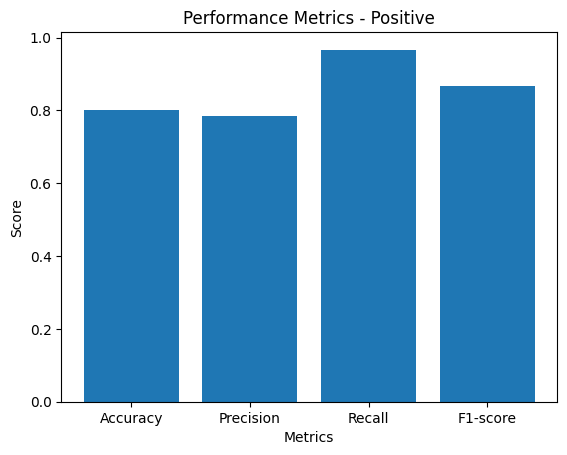

In [215]:
metrics_positive = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values_positive = [accuracy, precision_positive, recall_positive, f1_positive]

plt.bar(metrics_positive, values_positive)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics - Positive')
plt.show()

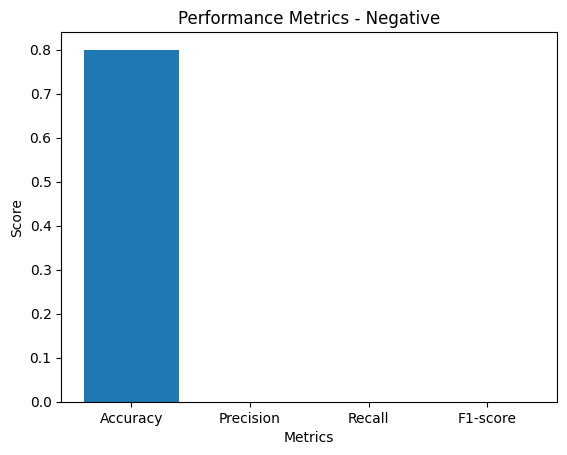

In [216]:
metrics_negative = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values_negative = [accuracy, precision_negative, recall_negative, f1_negative]

plt.bar(metrics_negative, values_negative)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics - Negative')
plt.show()